In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data_smart.csv', sep = ';', encoding = 'utf-8',engine='c')


df

FileNotFoundError: [Errno 2] No such file or directory: 'heart_2020_cleaned.csv'

In [12]:
from pycaret.classification import *
s = setup(df, target = 'Liga',train_size = 0.50, session_id=1551)

,Description,Value
0,session_id,1551
1,Target,Liga
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(398, 6)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = create_model("knn")



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,1.0000,0.8571,1.0000,0.9231,0.8864,0.8921
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9500,0.9615,1.0000,0.8750,0.9333,0.8936,0.8987
6,0.9000,1.0000,0.7143,1.0000,0.8333,0.7647,0.7868
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [19]:
print(best)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [20]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

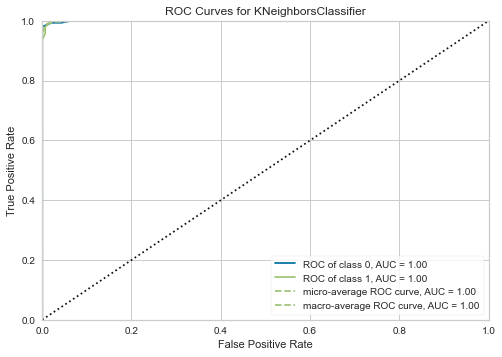

In [21]:
plot_model(best, plot = 'auc')



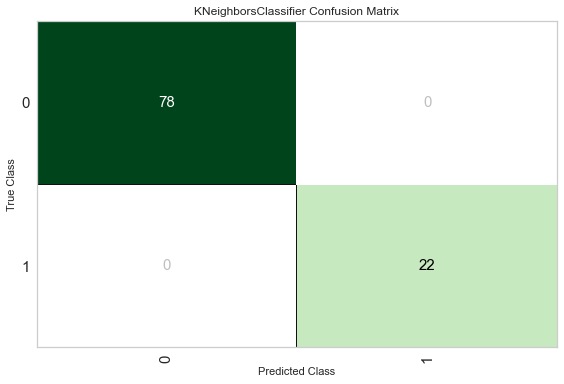

In [7]:
plot_model(best, plot = 'confusion_matrix')



In [8]:
predict_model(best)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,humidity,humiditySoil,temperature,HumidityIdeal_50,timeInstant_weekday_0,timeInstant_weekday_1,timeInstant_weekday_4,timeInstant_is_month_end_1,timeInstant_hour_10,timeInstant_hour_13,...,timeInstant_hour_15,timeInstant_hour_16,timeInstant_hour_17,timeInstant_hour_18,timeInstant_hour_6,timeInstant_hour_8,timeInstant_hour_9,Liga,Label,Score
0,95.00,48.000000,23.870001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0
1,35.00,67.809998,36.099998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
2,62.00,69.959999,29.040001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1.0
3,28.40,60.000000,39.419998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8
4,27.00,68.690002,39.700001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,33.75,69.940002,35.830002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
96,28.25,70.669998,38.529999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
97,32.00,67.839996,36.980000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
98,95.00,71.820000,24.040001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1.0


In [9]:
predictions = predict_model(best, data=df)
predictions.head()

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal,Label,Score
0,30-03-2022T21:26:49,73.0,92.26,27.90,0,50,0,1.0
1,29-03-2022T17:33:22,76.6,91.01,25.90,0,50,0,1.0
2,28-03-2022T18:15:21,92.2,83.98,25.32,0,50,0,1.0
3,29-03-2022T17:29:21,76.0,83.81,25.93,0,50,0,1.0
4,01-04-2022T10:30:14,88.0,8.57,20.40,1,50,1,1.0


In [10]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,timeInstant,humidity,humiditySoil,temperature,Liga,HumidityIdeal,Label,Score_0,Score_1
0,30-03-2022T21:26:49,73.0,92.26,27.90,0,50,0,1.0,0.0
1,29-03-2022T17:33:22,76.6,91.01,25.90,0,50,0,1.0,0.0
2,28-03-2022T18:15:21,92.2,83.98,25.32,0,50,0,1.0,0.0
3,29-03-2022T17:29:21,76.0,83.81,25.93,0,50,0,1.0,0.0
4,01-04-2022T10:30:14,88.0,8.57,20.40,1,50,1,0.0,1.0
